In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-upwind-direction)

If we solve advection over $[0,1]$ with velocity $c=-1$, the right boundary is in the upwind/inflow direction. Thus a well-posed boundary condition is $u(1,t)=0$.

We'll pattern a solution after {numref}`Function {number} <function-parabolic>`. Since $u(x_m,t)=0$, we define the ODE interior problem {eq}`mol-interior` for $\mathbf{v}$ without $u_m$. For each evaluation of $\mathbf{v}'$, we must extend the data back to $x_m$ first.

In [2]:
m = 80
x, Dx, Dxx = FNC.diffmat2(m, [0, 1])
chop = lambda u : u[:-1]    # remove right end
extend = lambda v: hstack([v, 0])

ode = lambda t, v: -c * chop( Dx @ extend(v) )
c = -1

Now we solve for an initial condition that has a single hump.

In [3]:
from scipy.integrate import solve_ivp
u_init = exp(-80 * (x - 0.5) ** 2)
sol = solve_ivp(ode, (0, 1), chop(u_init), method="RK45", dense_output=True)
u = lambda t: extend(sol.sol(t))

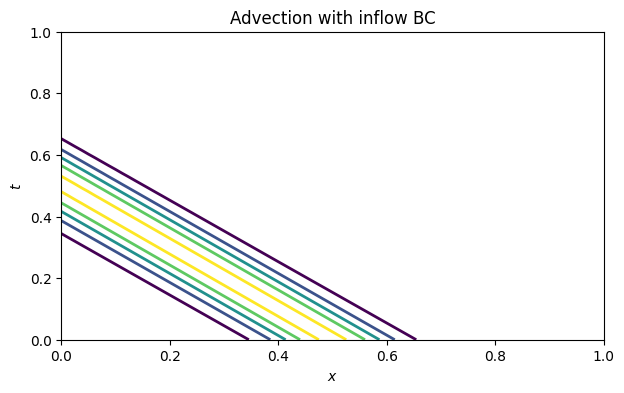

In [4]:
t = linspace(0, 1, 80)
U = [u(tj) for tj in t]
contour(x, t, U, levels=arange(0.15, 1.0, 0.2))
xlabel("$x$"),  ylabel("$t$")
title("Advection with inflow BC");

We find that the hump gracefully exits out the downwind end.

In [5]:
from matplotlib.animation import FuncAnimation
fig, ax = subplots()
curve = ax.plot(x, u_init)[0]
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
ax.set_xlabel("$x$")
ax.set_ylabel("$u(x,t)$")
ax.set_ylim(-0.1, 1.1)
ax.set_title("Advection with inflow BC")

def snapshot(t):
    curve.set_ydata(u(t))
    time_text.set_text(f"t = {t:.2f}")

anim = FuncAnimation(fig, snapshot, frames=linspace(0, 1, 101))
anim.save("advection-inflow.mp4", fps=30)
close()